In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

In [4]:
csv1 = pd.read_csv("output/csv1_core.csv")  # id, date, category, location, sentiment
csv2 = pd.read_csv("output/csv2_embeddings.csv")  # id, embedding
csv3 = pd.read_csv("output/csv3_keywords.csv")  # id, date, keyword
csv4 = pd.read_csv("output/csv4_metadata.csv")  # id, title, url

In [5]:
datasets = {
    "CSV1": csv1,
    "CSV2": csv2,
    "CSV3": csv3,
    "CSV4": csv4
}

for name, df in datasets.items():
    print(f"\n{name}")
    display(df.head())
    df.info()


CSV1


,id,date,category,location,sentiment
0,1,2020-01-01,Politics,unknown,Neutral
1,2,2020-01-01,Politics,unknown,Negative
2,3,2020-01-01,Politics,unknown,Neutral
3,4,2020-01-01,Politics,unknown,Neutral
4,5,2020-01-01,Politics,unknown,Neutral


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88851 entries, 0 to 88850
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         88851 non-null  int64 
 1   date       88851 non-null  object
 2   category   88851 non-null  object
 3   location   88851 non-null  object
 4   sentiment  20000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB

CSV2


,id,embedding
0,1,"[0.011247781105339527, -0.005072812549769878, ..."
1,2,"[0.003206590423360467, 0.005856730509549379, 0..."
2,3,"[0.07811641693115234, 0.012745300307869911, 0...."
3,4,"[-0.020863395184278488, 0.029394974932074547, ..."
4,5,"[-0.013838849030435085, 0.06205133721232414, -..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88851 entries, 0 to 88850
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         88851 non-null  int64 
 1   embedding  88851 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.4+ MB

CSV3


,id,date,keyword
0,1,2020-01-01,beating traffic policeman
1,1,2020-01-01,hold chinese citizen
2,1,2020-01-01,karachi chinese national
3,1,2020-01-01,national arrested booked
4,1,2020-01-01,car following chinese


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159998 entries, 0 to 159997
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       159998 non-null  int64 
 1   date     159998 non-null  object
 2   keyword  159998 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB

CSV4


,id,title,url
0,1,chinese national held for beating traffic poli...,https://www.dawn.com/news/1525657/chinese-nati...
1,2,iraqi paramilitaries call for withdrawal from ...,https://www.dawn.com/news/1525656/iraqi-parami...
2,3,sarmad khoosat reveals why zindagi tamasha s t...,https://www.dawn.com/news/1525655/sarmad-khoos...
3,4,psl 2020 set to begin on february 20,https://www.dawn.com/news/1525653/psl-2020-set...
4,5,despite extreme differences centre willing to ...,https://www.dawn.com/news/1525650/despite-extr...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88851 entries, 0 to 88850
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      88851 non-null  int64 
 1   title   88851 non-null  object
 2   url     88851 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [6]:
print("CSV1 unique IDs:", csv1["id"].nunique())
print("CSV2 unique IDs:", csv2["id"].nunique())
print("CSV3 unique IDs:", csv3["id"].nunique())
print("CSV4 unique IDs:", csv4["id"].nunique())

print("\nMissing IDs check:")
print("CSV2 missing in CSV1:", set(csv2["id"]) - set(csv1["id"]))
print("CSV3 missing in CSV1:", set(csv3["id"]) - set(csv1["id"]))
print("CSV4 missing in CSV1:", set(csv4["id"]) - set(csv1["id"]))


CSV1 unique IDs: 76005
CSV2 unique IDs: 76005
CSV3 unique IDs: 20000
CSV4 unique IDs: 76005

Missing IDs check:
CSV2 missing in CSV1: set()
CSV3 missing in CSV1: set()
CSV4 missing in CSV1: set()


In [7]:
csv1["date"] = pd.to_datetime(csv1["date"], errors="coerce")
csv3["date"] = pd.to_datetime(csv3["date"], errors="coerce")

csv1["year"] = csv1["date"].dt.year
csv1["month"] = csv1["date"].dt.month


In [8]:
sentiment_map = {
    "negative": -1,
    "neutral": 0,
    "positive": 1
}

if csv1["sentiment"].dtype == object:
    csv1["sentiment_encoded"] = csv1["sentiment"].map(sentiment_map)
else:
    csv1["sentiment_encoded"] = csv1["sentiment"]


In [9]:
for name, df in datasets.items():
    print(f"\n{name} missing values:")
    display(df.isna().sum())



CSV1 missing values:


id                       0
date                     0
category                 0
location                 0
sentiment            68851
year                     0
month                    0
sentiment_encoded    88851
dtype: int64


CSV2 missing values:


id           0
embedding    0
dtype: int64


CSV3 missing values:


id         0
date       0
keyword    0
dtype: int64


CSV4 missing values:


id       0
title    0
url      0
dtype: int64

In [10]:
csv1 = csv1.dropna(subset=["id", "date", "category"])
csv1["location"] = csv1["location"].fillna("Unknown")
csv3["keyword"] = csv3["keyword"].fillna("Unknown")


In [11]:
print("CSV1 duplicates:", csv1.duplicated().sum())
print("CSV3 duplicates:", csv3.duplicated().sum())

csv1 = csv1.drop_duplicates()
csv3 = csv3.drop_duplicates()


CSV1 duplicates: 8564
CSV3 duplicates: 0


In [12]:
csv1["category"] = csv1["category"].str.strip().str.title()
csv1["location"] = csv1["location"].str.strip().str.title()

csv1["category"].value_counts().head()


category
Politics    77419
World        1258
Sports        868
Tennis        499
Business      243
Name: count, dtype: int64

In [13]:
print("Articles per category:")
display(csv1["category"].value_counts())

print("\nArticles per location:")
display(csv1["location"].value_counts().head(10))

print("\nSentiment distribution:")
display(csv1["sentiment_encoded"].value_counts())


Articles per category:


category
Politics    77419
World        1258
Sports        868
Tennis        499
Business      243
Name: count, dtype: int64


Articles per location:


location
Unknown       53080
Islamabad      7077
Karachi        4500
Lahore         3197
Peshawar       1376
Washington      910
London          784
Quetta          748
Rawalpindi      574
Paris           361
Name: count, dtype: int64


Sentiment distribution:


Series([], Name: count, dtype: int64)

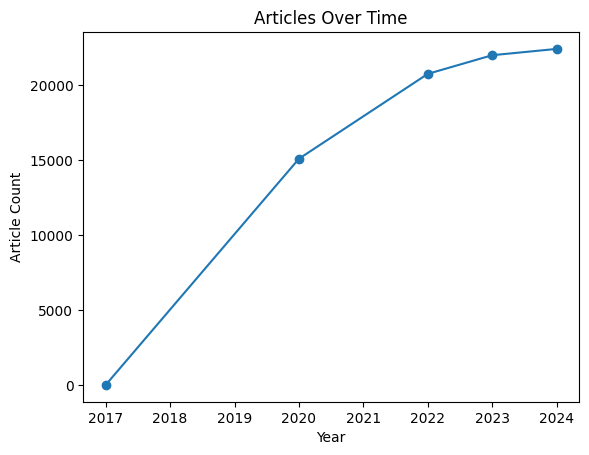

In [14]:
articles_per_year = csv1.groupby("year").size()

articles_per_year.plot(kind="line", marker="o", title="Articles Over Time")
plt.xlabel("Year")
plt.ylabel("Article Count")
plt.show()


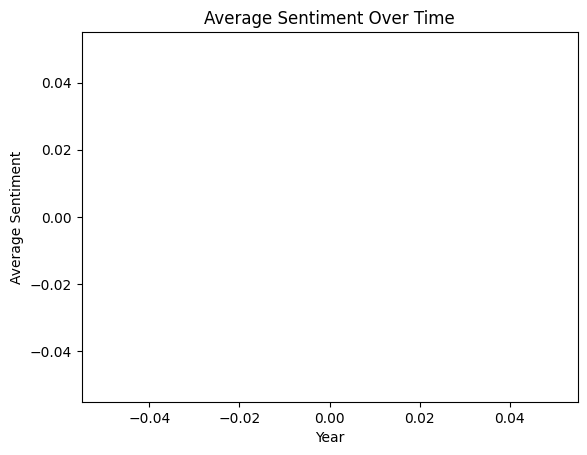

In [15]:
sentiment_trend = csv1.groupby("year")["sentiment_encoded"].mean()

sentiment_trend.plot(kind="line", marker="o", title="Average Sentiment Over Time")
plt.xlabel("Year")
plt.ylabel("Average Sentiment")
plt.show()


In [16]:
print("Unique locations count:", csv1["location"].nunique())
display(csv1["location"].value_counts().head(15))


Unique locations count: 851


location
Unknown         53080
Islamabad        7077
Karachi          4500
Lahore           3197
Peshawar         1376
Washington        910
London            784
Quetta            748
Rawalpindi        574
Paris             361
New Delhi         306
Beijing           182
Muzaffarabad      160
Gilgit            158
Kabul             155
Name: count, dtype: int64

In [17]:
keyword_counts = csv3["keyword"].value_counts()

keyword_counts.head(20)


keyword
said                    199
confirmed               145
coronavirus             128
covid 19                 91
2020                     82
covid 19 pandemic        72
years                    69
months                   59
statement                58
19                       56
2022                     54
coronavirus pandemic     52
does                     45
coronavirus outbreak     44
sindh high court         43
said government          42
islamabad                42
covid 19 cases           41
karachi stock market     41
covid                    40
Name: count, dtype: int64

In [18]:
keyword_time = csv3.merge(csv1[["id", "year"]], on="id", how="left")

keyword_trend = (
    keyword_time
    .groupby(["year", "keyword"])
    .size()
    .reset_index(name="count")
)

keyword_trend.head()


,year,keyword,count
0,2020,000,8
1,2020,000 000 day,1
2,2020,000 27,1
3,2020,000 40kg,1
4,2020,000 47 62,1


In [19]:
from itertools import combinations
from collections import Counter

doc_keywords = csv3.groupby("id")["keyword"].apply(set)

co_occurrence = Counter()

for keywords in doc_keywords:
    for pair in combinations(sorted(keywords), 2):
        co_occurrence[pair] += 1

co_df = pd.DataFrame(
    [(k1, k2, v) for (k1, k2), v in co_occurrence.items()],
    columns=["keyword_1", "keyword_2", "count"]
)

co_df.head()


,keyword_1,keyword_2,count
0,beating traffic policeman,car following chinese,1
1,beating traffic policeman,hold chinese citizen,1
2,beating traffic policeman,karachi chinese national,1
3,beating traffic policeman,national arrested booked,1
4,beating traffic policeman,officials said,1


In [20]:
category_counts = csv1["category"].value_counts()

q1 = category_counts.quantile(0.25)
q3 = category_counts.quantile(0.75)
iqr = q3 - q1

outliers = category_counts[
    (category_counts < q1 - 1.5 * iqr) |
    (category_counts > q3 + 1.5 * iqr)
]

outliers


category
Politics    77419
Name: count, dtype: int64

In [21]:
fact_table = csv1.groupby(
    ["year", "category", "location"],
    as_index=False
).agg(
    article_count=("id", "count"),
    avg_sentiment=("sentiment_encoded", "mean")
)

fact_table.head()


,year,category,location,article_count,avg_sentiment
0,2017,Politics,Unknown,1,NaN
1,2020,Business,Abu Dhabi,2,NaN
2,2020,Business,Bahawalpur,1,NaN
3,2020,Business,Budapest,1,NaN
4,2020,Business,Imola,2,NaN


In [22]:
summary = {
    "Total Articles": csv1.shape[0],
    "Total Categories": csv1["category"].nunique(),
    "Total Locations": csv1["location"].nunique(),
    "Total Keywords": csv3["keyword"].nunique(),
    "Date Range": (csv1["date"].min(), csv1["date"].max())
}

summary

{'Total Articles': 80287,
 'Total Categories': 5,
 'Total Locations': 851,
 'Total Keywords': 148088,
 'Date Range': (Timestamp('2017-05-12 00:00:00'),
  Timestamp('2024-12-31 00:00:00'))}